# Introduction to Word2Vec
by Eugenio Tufino, University of Padova, 9 December 2024

[Link to Google Colab](https://colab.research.google.com/drive/1nxx5nuNEq4xFuBqHiyVrRdkSd2ROOZc5#scrollTo=pDKqQJFeSW0f&line=3&uniqifier=1)

Word2Vec is a powerful algorithm introduced by Mikolov et al. (2013) for learning word embeddings—numerical vector representations of words. These embeddings capture  semantic relationships between words by analyzing their co-occurrences within a large corpus of text. Words that appear in similar contexts are mapped to vectors that are close to each other in a high-dimensional space, enabling the discovery of relationships such as analogies (e.g., "king" - "man" + "woman" ≈ "queen").

By representing words as vectors, Word2Vec opens the door to exploring complex linguistic and conceptual relationships in an intuitive, mathematical form.


This notebook allows students to explore the Word2Vec model interactively.


**Further reading:**   

- https://en.wikipedia.org/wiki/Word2vec

- Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Efficient Estimation of Word Representations in Vector Space. arXiv preprint arXiv:1301.3781. [Link](https://arxiv.org/pdf/1301.3781)



Image by Grant Sanderson (3Blue1Brown Youtube Channel)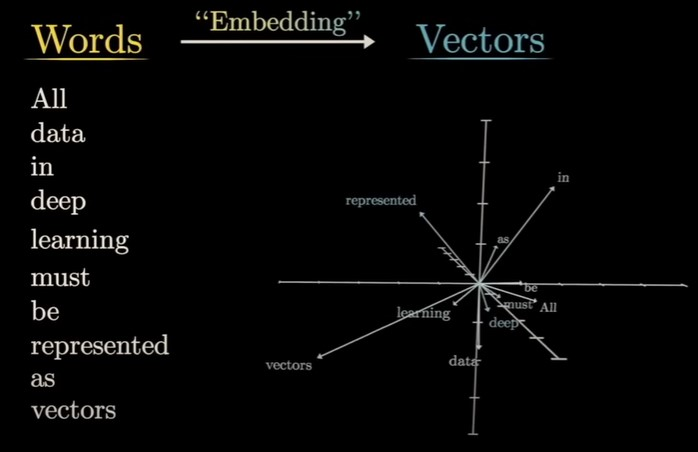

### Import the libraries for using Word2Vec
library gensim: https://github.com/piskvorky/gensim/blob/develop/gensim/models/word2vec.py

In [161]:
!pip install gensim scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import gensim.downloader as api
from sklearn.decomposition import PCA


## In this lesson and with the computational and time resources available, the choice is limited to the following two models:
- glove-twitter-25
- Glove-Wikipedia-Gigaword-100

Different Word2Vec models have varying capabilities.
Each Word2Vec model is trained on a specific corpus (data)
and with different parameters, which affects its performance for particular tasks.

With a little experience you can even customize your own Word2Vec model.

### 1° Model

In [162]:

# Load the model (this might take a few minutes the first time)
#model_twitter = api.load('glove-twitter-25')  #Uncomment this line if you want to load this model
# it is a model used to understand twitter language, not very good for physics language


### 2° Model

Given that we want to talk about physics we will use this.

In [163]:
# Load the GloVe Wikipedia + Gigaword model
print("Loading GloVe-Wikipedia-Gigaword-100...")
glove_model = api.load('glove-wiki-gigaword-100')
print("GloVe-Wikipedia-Gigaword-100 loaded successfully!")


Loading GloVe-Wikipedia-Gigaword-100...
GloVe-Wikipedia-Gigaword-100 loaded successfully!


### 3° Model, it is bigger infact the file is about 1.5 GB, try at home!
- Word2Vec-Google-News-300

In [164]:
# Load the second model: Word2Vec-Google-News-300
#UNCOMMENT the load command
print("Loading the Word2Vec-Google-News-300 model...")
#UNCOMMENT the load command
#google_news_model = api.load('word2vec-google-news-300')
print("Word2Vec-Google-News-300 model loaded successfully!")
# This model is trained on Google News, providing a more formal and general language understanding.


Loading the Word2Vec-Google-News-300 model...
Word2Vec-Google-News-300 model loaded successfully!


###  Check the size of the vocabulary of a model

In [165]:
# Check the size of the vocabulary of the chosen model
model=glove_model
vocabulary_size = len(model.key_to_index)
print(f"Vocabulary size: {vocabulary_size}")
# Check the vector size (number of dimensions)
vector_size = model.vector_size
print(f"Vector size (number of dimensions): {vector_size}")



Vocabulary size: 400000
Vector size (number of dimensions): 100


### Therefore the glove wikipedia model has 400000 words and represents each word as a vector with 100 dimensions.

## Functions

### We can check the list of all available functions and attributes of the model:

In [166]:

public_methods = [method for method in dir(model) if not method.startswith("_")]
print(public_methods)

['add_lifecycle_event', 'add_vector', 'add_vectors', 'allocate_vecattrs', 'closer_than', 'cosine_similarities', 'distance', 'distances', 'doesnt_match', 'evaluate_word_analogies', 'evaluate_word_pairs', 'expandos', 'fill_norms', 'get_index', 'get_mean_vector', 'get_normed_vectors', 'get_vecattr', 'get_vector', 'has_index_for', 'index2entity', 'index2word', 'index_to_key', 'init_sims', 'intersect_word2vec_format', 'key_to_index', 'lifecycle_events', 'load', 'load_word2vec_format', 'log_accuracy', 'log_evaluate_word_pairs', 'mapfile_path', 'most_similar', 'most_similar_cosmul', 'most_similar_to_given', 'n_similarity', 'next_index', 'norms', 'rank', 'rank_by_centrality', 'relative_cosine_similarity', 'resize_vectors', 'save', 'save_word2vec_format', 'set_vecattr', 'similar_by_key', 'similar_by_vector', 'similar_by_word', 'similarity', 'similarity_unseen_docs', 'sort_by_descending_frequency', 'unit_normalize_all', 'vector_size', 'vectors', 'vectors_for_all', 'vectors_norm', 'vocab', 'wmdis

###  Most useful functions for Word2Vec models:

In [167]:

# 1. model.most_similar(word, topn=5): Finds the top-N words most similar to the given word.
#    Example: model.most_similar("physics", topn=5)
# 2. model.similarity(word1, word2): Computes the similarity score between two words.
#    Example: model.similarity("physics", "science")
# 3. model.doesnt_match(list_of_words): Finds the word that doesn't fit with the others.
#    Example: model.doesnt_match(["physics", "chemistry", "dog"])
# 4. model.key_to_index: Retrieves the vocabulary of the model.
#    Example: list(model.key_to_index.keys())[:10]  # First 10 words
# 5. model.get_vector(word): Retrieves the vector representation of a word.
#    Example: vector = model.get_vector("physics")
# 6. model.save(filepath) and model.load(filepath): Save and load models.
#    Example: model.save("my_model.model") and gensim.models.Word2Vec.load("my_model.model")

For convenience, in the following we define some functions/methods with parameters already set, that we can use:


In [168]:
def find_similar_words(word, topn=5):
  """
    Finds the top-N most similar words to the given word.

    Parameters:
        word (str): The word to find similar words for.
        topn (int): Number of similar words to return (default: 5).

    Returns:
        list: A list of tuples (word, similarity score).
  """
  return model.most_similar(word, topn=topn)

def analogy(word1, word2, word3, topn=1):

  """
  Solves an analogy of the form: word1 is to word2 as word3 is to ?.

    Parameters:
        word1 (str): The first word in the analogy (the "base" word to subtract).
        word2 (str): The second word in the analogy (the "target" word to add).
        word3 (str): The third word in the analogy (the "comparison" word to add).
        topn (int): Number of results to return (default: 1).
  """

  return model.most_similar(positive=[word2, word3], negative=[word1], topn=topn)

def visualize_words(words):

    """
    2D visualisation of word embeddings
    This function takes a list of words, retrieves their corresponding word
    embeddings from the loaded Word2Vec model, and reduces the dimensionality
    of the embeddings to 2D using Principal Component Analysis (PCA).
    The resulting 2D vectors are plotted as points in a scatter plot

    """
    word_vectors = [model[word] for word in words]
    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)

    plt.figure(figsize=(10, 8))
    plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

    plt.title("2D Visualization of Word Embeddings", fontsize=18)
    plt.grid(True)
    plt.show()



### Similar words
The function applies only to words included originally in the model vocabulary

In [169]:
# Example 1
find_similar_words("physics")

[('chemistry', 0.8497999906539917),
 ('mathematics', 0.834094762802124),
 ('science', 0.7914698719978333),
 ('biology', 0.7894973158836365),
 ('theoretical', 0.7342938780784607)]

In [170]:
# Example 2
concept = "wave"
print(f"Words similar to '{concept}':")
print(find_similar_words(concept))

Words similar to 'wave':
[('waves', 0.7943201065063477), ('massive', 0.6597336530685425), ('triggered', 0.6411253213882446), ('tide', 0.6409763097763062), ('violent', 0.6315351724624634)]


### To calculate the similary between two words, word2vec apply the cosine similarity concept (see Annex A)

In [171]:
# Exercise 1
# Try it by yourself
#Try changing the value of concept to other physics terms like "force", "mass", etc

### Analogies

In [172]:
# Analogies

word1, word2, word3 = "electron", "proton", "negative"
print(f"\nAnalogy: {word1} : {word2} :: {word3} : ?")
print(analogy(word1, word2, word3))


Analogy: electron : proton :: negative : ?
[('positive', 0.6567757725715637)]


In [173]:
print("\nAnalogy: man : woman :: king : ?")
print(analogy('man', 'woman', 'king'))


Analogy: man : woman :: king : ?
[('queen', 0.7698540687561035)]


Something about food preferences


In [174]:
print("\nAnalogy: japanise : sushi :: italian : ?")
print(analogy('japanese', 'sushi', 'italian'))


Analogy: japanise : sushi :: italian : ?
[('pasta', 0.6288173794746399)]


So it is 'pasta'. We can set `topn=10` to read the other choices

In [175]:
print("\nAnalogy: japanise : sushi :: italian : ?")
print(analogy('japanese', 'sushi', 'italian',topn=10))


Analogy: japanise : sushi :: italian : ?
[('pasta', 0.6288173794746399), ('tapas', 0.6202685236930847), ('chef', 0.6200571656227112), ('dessert', 0.6084833145141602), ('chefs', 0.5927475690841675), ('cuisine', 0.5911109447479248), ('bistro', 0.5910441875457764), ('gourmet', 0.5872135758399963), ('ducasse', 0.5794909596443176), ('pastry', 0.5783949494361877)]


Surprisingly, there is no pizza listed!

In [176]:
# Exercise 2
#Try creating your own analogies by changing the values of word1, word2, and word3. Use physics concepts you're familiar with.
#Experiment with different combinations and observe the results.


### If you try:

In [177]:
print("\nAnalogy: woman : nurse :: man : ?")
print(analogy('woman', 'nurse', 'man'))


Analogy: woman : nurse :: man : ?
[('doctor', 0.7208850979804993)]


AS you can see the model reflects the biases present in the corpus (e.g., texts historically dominated by **gender stereotypes**).

In [178]:
#We ask for the 5 words nearest:

print(analogy('woman', 'nurse', 'man', topn=5))



[('doctor', 0.7208850979804993), ('physician', 0.6038255095481873), ('officer', 0.598569929599762), ('hospital', 0.597952127456665), ('surgeon', 0.5937884449958801)]


For other examples see the Table 8 of the paper https://arxiv.org/pdf/1301.3781

### Possibile explanations of mistakes in the analogies:

Model Quality: If the model was trained on a corpus (dataset) that does not sufficiently emphasize semantic relationships between terms like "king," "queen," "man," and "woman," the results may be different or less accurate.

Corpus Ambiguity: If the corpus includes multiple meanings for a word (e.g., "king" used metaphorically), the model may capture less specific relationships.

Static Model Limitations: Models like Word2Vec or GloVe assign a **single vector** to each word, ignoring specific context. This can lead to errors, especially with polysemous words.

## Visualize Word Embedding in two dimensions

The visualization of a vector of size 100 (with the model loaded) in 2D is obtained with PCA (Principal Component Analysis). PCA reduces the high-dimensional 100-dimensional vector space to 2D. PCA may may lose important relationships between words in the reduced dimensions. It’s best suited for visualization, not precise analysis.

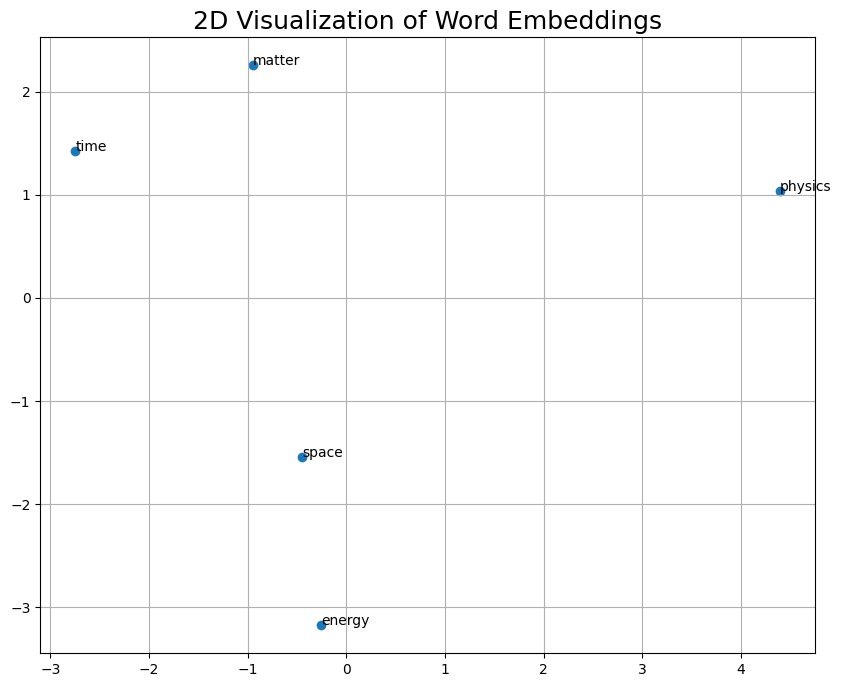

In [179]:
# Visualyze some words in 2d space
visualize_words(['physics', 'energy', 'matter', 'space', 'time'])

### It is possible to retrieve all the components of  a given word vector

In [182]:
# # Define the word to retrieve the vector for
word = "physics"

# Try to retrieve the vector for the given word
try:
    vector = model[word]  # Retrieve the vector
    print(f"Vector for '{word}':\n{vector} \n It has {len(vector)} components")

except KeyError:
    print(f"The word '{word}' is not in the model vocabulary.")


Vector for 'physics':
[ 0.38438    0.6775     0.19917    0.85868    0.64199   -0.86999
  0.97737   -0.3251    -0.79189    0.84747    0.16542   -1.0649
 -0.22364    1.0078    -0.21329   -0.053761  -0.12243    0.98599
  0.17041   -0.37046   -0.65436   -0.019153   0.49521   -0.27765
  0.30316   -0.4635    -0.11864   -0.20677    0.38216    0.17818
 -1.2728     0.24467   -1.3661     0.24187   -0.82715    0.16062
 -0.26667    0.66961   -0.40382   -0.42986   -0.71138   -0.097292
 -1.3057    -0.83636   -0.60994    0.30468    0.71529    0.8308
 -0.58492    0.58139    1.0738    -0.50557    0.43983    0.40325
  0.2703    -0.62618    0.50101    0.4127     0.97117   -0.0023844
 -0.12813    0.60037   -0.56398    0.1131     1.0617     0.50948
  0.31724    0.66798    0.38002    0.61937   -0.18941    0.57344
  0.93109    0.296     -1.1131     0.28911    0.73269   -0.90771
 -0.59169   -0.09907    0.12467    0.33638   -0.72382   -0.95562
 -1.0909     1.2556     0.49731   -0.92081   -0.18294   -0.94388
  

The other model 'Glove-Twitter' ha vector of 25 components.

As said the reduction of a 100 components vector to 2 components vector has been managed by the PCA techinque.

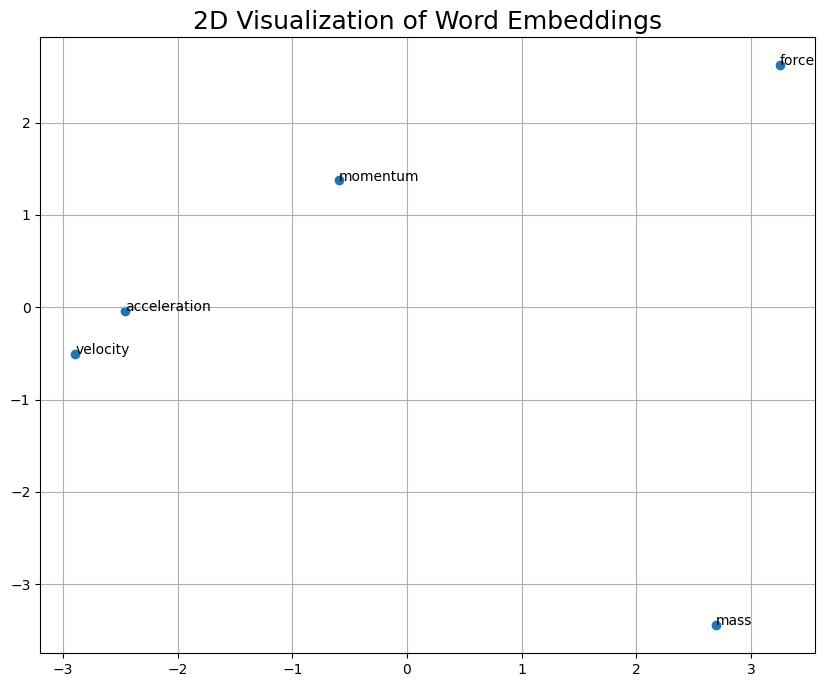

In [183]:
# Another example
parole_da_visualizzare = ['force', 'mass', 'acceleration', 'velocity', 'momentum']  # Gli studenti possono cambiare queste
visualize_words(parole_da_visualizzare)

In [156]:
#Exercise:
#Add the following word to the previous list. 'cat', 'dog'

## Reflect on these questions
1. Do the spatial relationships between words match your understanding of how these concepts are related in physics?
2. Are there any surprising placements or groupings?
3. How might this kind of visualization be useful (or misleading) in understanding physics concepts?

In [186]:

def analyze_word_relations(word, model, topn=10):
    """
  It dentifies and prints the top-N words that are most similar to a given word based
  on their vector embeddings in the provided Word2Vec model.
    """
    similar_words = model.most_similar(word, topn=topn)
    print(f"Words most similar to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"  {similar_word}: {similarity:.4f}")

In [187]:
# Example
analyze_word_relations("nature", model, topn=10)

Words most similar to 'nature':
  natural: 0.7198
  true: 0.7150
  aspects: 0.7124
  life: 0.7035
  view: 0.6961
  knowledge: 0.6918
  particular: 0.6814
  fact: 0.6810
  existence: 0.6780
  mind: 0.6775


In [188]:
# Analyze some physics words
for word in ['acceleration', 'entropy', 'force', 'energy']:    # for loop
    analyze_word_relations(word, model)
    print()

Words most similar to 'acceleration':
  deceleration: 0.7234
  braking: 0.6989
  speed: 0.6343
  velocity: 0.6001
  speeds: 0.5813
  displacement: 0.5788
  torque: 0.5612
  vibration: 0.5600
  accelerating: 0.5540
  coupled: 0.5512

Words most similar to 'entropy':
  thermodynamic: 0.6863
  equilibrium: 0.6304
  enthalpy: 0.6246
  equation: 0.6054
  thermodynamics: 0.5856
  formula_4: 0.5829
  variance: 0.5807
  permeability: 0.5805
  formula_10: 0.5802
  formula_9: 0.5797

Words most similar to 'force':
  forces: 0.8348
  military: 0.8106
  army: 0.7940
  troops: 0.7541
  air: 0.7521
  command: 0.7431
  personnel: 0.7120
  combat: 0.7104
  deployed: 0.7018
  civilian: 0.6977

Words most similar to 'energy':
  resources: 0.7294
  gas: 0.7245
  renewable: 0.7101
  natural: 0.7034
  petroleum: 0.6990
  electricity: 0.6933
  oil: 0.6860
  power: 0.6644
  development: 0.6643
  fuel: 0.6633



### Questions after the activities:

1. What interesting relationships did you discover?
2. Were there any surprising or unexpected outcomes?
3. What limitations do you notice in this approach to word representation?

### Finally a well-known example: king - man + woman ≈ queen

We want to keep the same code without introducing new functions.
We construct the vector: king - man + woman and temporarily add it to the vocabulary.
Then we plot it and observe that it is close to the word queen.

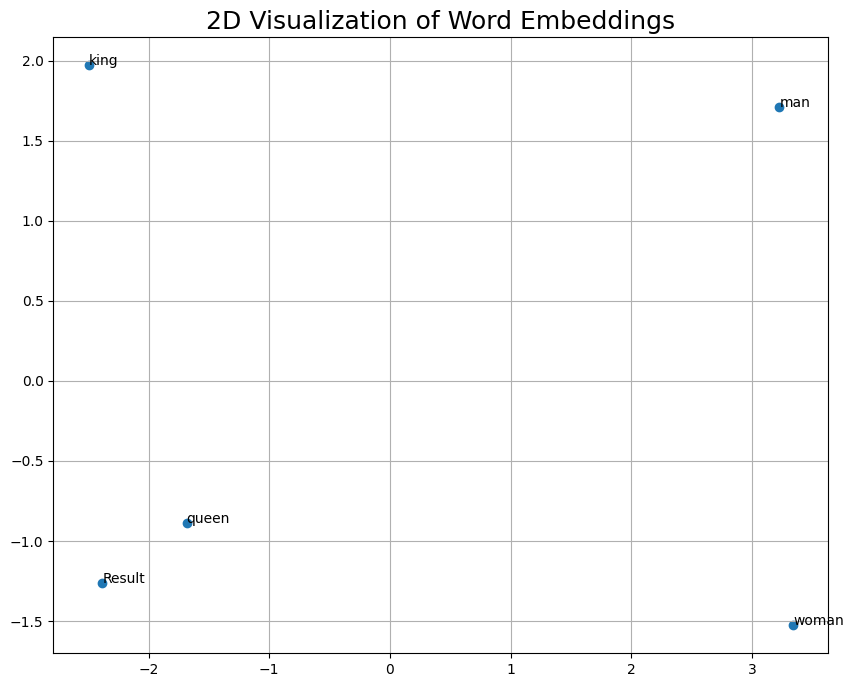

In [190]:
# Words to visualize
words_to_visualize = ['king', 'man', 'woman', 'queen']

# Define and Compute the result vector
result_vector = model['king'] - model['man'] + model['woman']

# Add the result vector to the model
model['Result'] = result_vector

# Visualize 'queen' and the result
visualize_words(['king', 'man', 'woman','queen', 'Result'])

# Clean up: Remove the temporary vector from the model
del model.key_to_index['Result']

You can see that the word  vector '**Result**' and '**queen**' are near in the 2D space.
You can calculate as exercise the cosine similarity  between 'Result' and 'queen' (see Annex A)



### The exercises with this notebook end here. Good job! :-)

## Optional Section: Explore on your own




### Run the following code.

In [191]:
# We introduce a function  to visualize word groups

def visualize_words(word_groups):
    words = [word for group in word_groups for word in group if word in model.key_to_index]
    word_vectors = [model[word] for word in words]

    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)

    plt.figure(figsize=(12, 10))
    colors = ['r', 'g', 'b', 'c', 'm']

    for i, group in enumerate(word_groups):
        group_words = [word for word in group if word in model.key_to_index]
        group_vectors = [word_vectors_2d[words.index(word)] for word in group_words]
        x, y = zip(*group_vectors) if group_vectors else ([], [])
        plt.scatter(x, y, c=colors[i], label=f'Group {i+1}')

        for word, (x, y) in zip(group_words, group_vectors):
            plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')

    plt.title("2D Visualization of Physics Concepts (GloVe Model)")
    plt.legend()
    plt.grid(True)
    plt.show()

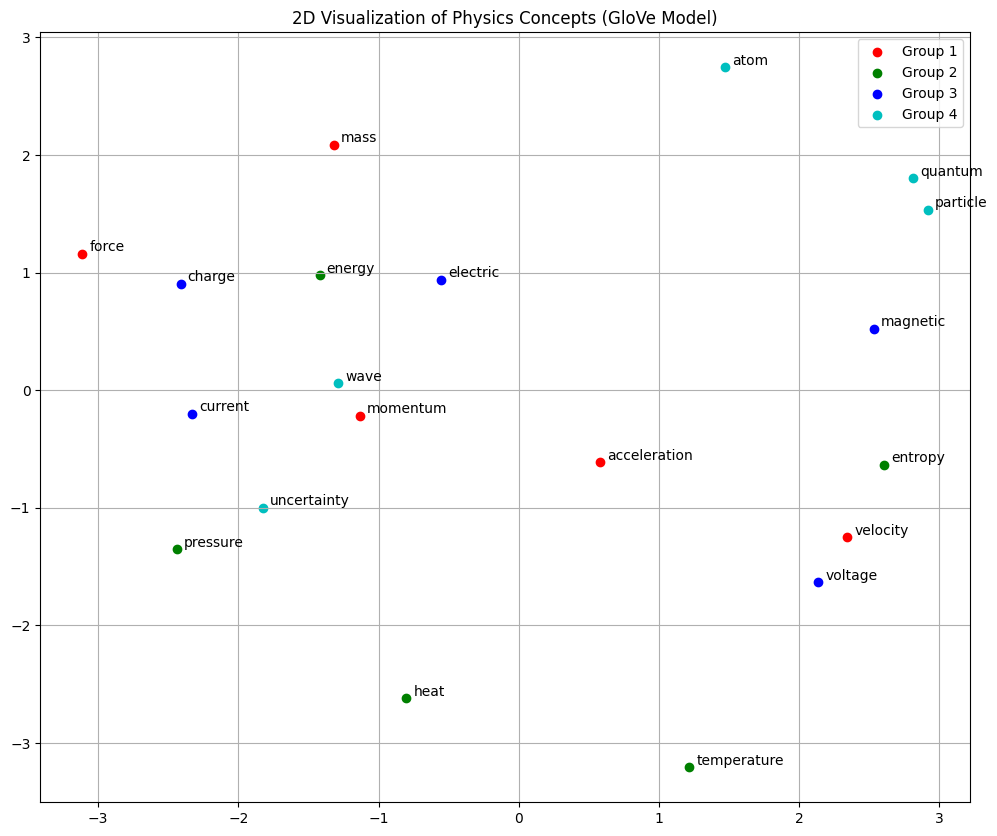

In [192]:
# Example
# Definy the following group of words
mechanics = ['force', 'mass', 'acceleration', 'velocity', 'momentum']
thermodynamics = ['heat', 'temperature', 'entropy', 'energy', 'pressure']
electromagnetism = ['charge', 'current', 'voltage', 'magnetic', 'electric']
quantum = ['quantum', 'wave', 'particle', 'uncertainty', 'atom']

# Visualize the group words
visualize_words([mechanics, thermodynamics, electromagnetism, quantum])


## Annex A. Cosine Similarity

image from Wikipedia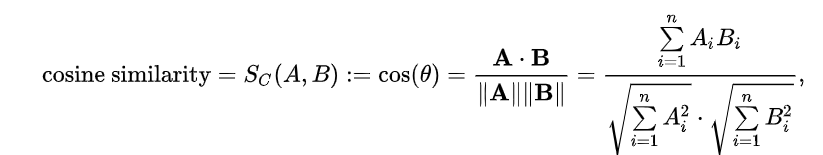

In [197]:
#Cosine Similarity
# Define the vectors
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

# Calculate the cosine similarity
# np.dot(A, B) returns the dot product of A and B.
cosine_similarity = np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))
print(f"Cosine Similarity: {cosine_similarity:.4f}")


Cosine Similarity: 0.9746
